In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read csv and save it as Pandas DataFrame
data1 = pd.read_csv('2000_2001_hitter.csv')
data2 = pd.read_csv('2002_2013_hitter.csv')
data3 = pd.read_csv('2014_hitter.csv')

data1.head()


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,OBP,SLG,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2000Park Jong -ho,2000,1,Park Jong -ho,현대,0.340,121,541,441,150,...,0.428023,0.489796,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,2000Kim Dong -ju,2000,2,Kim Dong -ju,두산,0.339,127,539,469,159,...,0.413729,0.603412,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,2000Brido,2000,3,Brido,SK,0.338,103,452,405,137,...,0.398664,0.533333,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,2000Song Ji-man,2000,4,Song Ji-man,한화,0.338,120,530,468,158,...,0.409434,0.621795,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,2000Davis,2000,5,Davis,한화,0.334,107,458,419,140,...,0.367033,0.565632,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


In [4]:
# concat files
df_combined = pd.concat([data1,data2,data3],ignore_index=True)
df_combined.head()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
0,2000Park Jong -ho,2000,1,Park Jong -ho,현대,0.340,121,541,441,150,...,0.976667,100.354529,8.286154,0.400138,92.804,NaN,NaN,NaN,NaN,NaN
1,2000Kim Dong -ju,2000,2,Kim Dong -ju,두산,0.339,127,539,469,159,...,1.063830,115.473840,9.306847,0.431993,105.000,NaN,NaN,NaN,NaN,NaN
2,2000Brido,2000,3,Brido,SK,0.338,103,452,405,137,...,0.931655,86.204956,8.224501,0.400969,77.820,NaN,NaN,NaN,NaN,NaN
3,2000Song Ji-man,2000,4,Song Ji-man,한화,0.338,120,530,468,158,...,1.110092,119.916981,9.811389,0.436688,107.594,NaN,NaN,NaN,NaN,NaN
4,2000Davis,2000,5,Davis,한화,0.334,107,458,419,140,...,0.923588,82.605677,7.125729,0.394586,80.284,NaN,NaN,NaN,NaN,NaN


# column extraction

['YrPlayer', 'OPS', 'ISO', 'SECA', 'TA', 'RC', 'RC/27', 'wOBA', 'XR']

In [5]:
#column extraction
column_to_ext = ['YrPlayer', 'OPS', 'ISO', 'SECA', 'TA', 'RC', 'RC/27', 'wOBA', 'XR']
df_selected = df_combined[column_to_ext]
df_selected.tail()

,YrPlayer,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
644,2014Lee Beom-ho,0.857,0.228571,0.377143,0.884328,64.894286,6.441712,0.369291,63.468
645,2014Mo Changmin,0.733,0.150358,0.276850,0.676647,53.028291,4.138046,0.319970,55.644
646,2014Oh Ji-hwan,0.767,0.151134,0.355164,0.818182,64.147759,5.463689,0.336344,63.404
647,2014Cho Dong-hwa,0.655,0.063205,0.146727,0.539359,48.898621,3.520701,0.293759,48.544
648,2014Kim Jae-ho,0.674,0.073314,0.231672,0.620818,41.969406,3.867488,0.304498,44.468


In [6]:
# Select only features from extracted columns
X = df_selected.loc[:, column_to_ext[1:]].values
X.shape

(649, 8)

# scaling

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)  
X_scaled

array([[ 0.97614887, -0.07422939,  0.10417649, ...,  1.20484091,
         1.11880719,  1.21433377],
       [ 1.89711625,  1.67989079,  1.05416505, ...,  1.75823146,
         1.89486616,  1.85744936],
       [ 1.10761611,  0.61991005, -0.16048453, ...,  1.1714146 ,
         1.13904003,  0.42420225],
       ...,
       [-0.42233048, -0.05169927,  0.77350431, ..., -0.32541846,
        -0.43538549, -0.33597768],
       [-1.46085838, -1.39601302, -1.62726689, ..., -1.37885116,
        -1.47288829, -1.11957047],
       [-1.28467954, -1.24146838, -0.64887581, ..., -1.19083305,
        -1.21125882, -1.3345048 ]])

# PCA

In [8]:
from sklearn.decomposition import PCA
# Calculate Principal Components

pca = PCA()
principal_components = pca.fit_transform(X_scaled)
principal_components.shape

(649, 8)

In [9]:
# View the percentage of variance explained by column
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.05145728e-01, 5.06261666e-02, 2.18885403e-02, 1.84561022e-02,
       2.99299164e-03, 5.56239341e-04, 1.83919162e-04, 1.50312428e-04])

In [10]:
# Check the cumulative variance
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.90514573, 0.95577189, 0.97766044, 0.99611654, 0.99910953,
       0.99966577, 0.99984969, 1.        ])

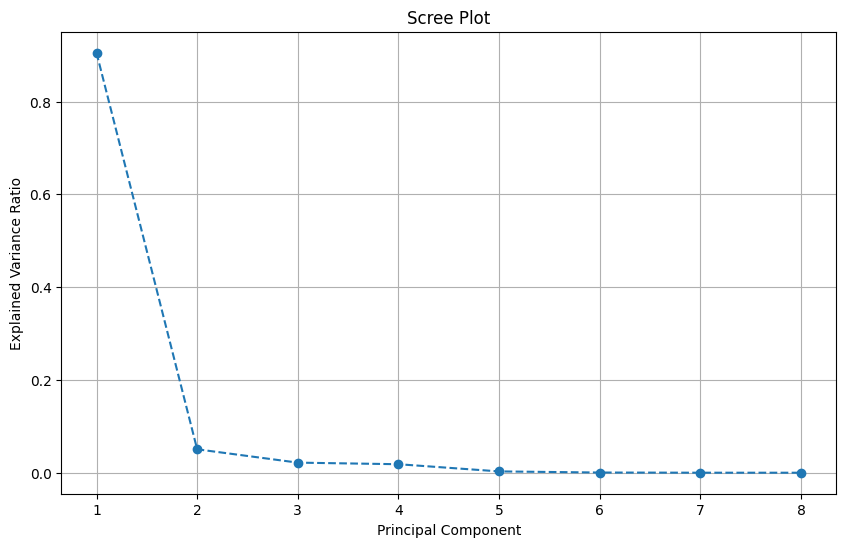

In [11]:
# Plot Scree Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1, 1))
plt.grid()
plt.show()

In [12]:
# Select the optimal number of principal components (choose the minimum number of principal components that explain more than 95% of the variance)
optimal_components = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= 0.95) + 1
optimal_components

2

### Determine two PCA principal components.

In [13]:
from sklearn.decomposition import PCA

# Perform PCA, convert to 2 principal components
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(X_scaled)
principal_components

array([[ 2.48864775, -1.29871071],
       [ 4.8638416 , -0.32843484],
       [ 2.05850718, -0.4397998 ],
       ...,
       [-0.3971905 ,  0.69084294],
       [-3.94087277, -0.42488303],
       [-3.33227219,  0.22550401]])

In [14]:
# Print PCA explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.90514573, 0.05062617])

In [15]:
# Create the resulting dataframe with PC1, PC2 
principal_df = pd.DataFrame(data=principal_components, columns=['pca1', 'pca2'])
principal_df

,pca1,pca2
0,2.488648,-1.298711
1,4.863842,-0.328435
2,2.058507,-0.439800
3,5.544865,-0.087107
4,2.134990,0.387255
...,...,...
644,1.024438,1.383975
645,-1.873179,0.821719
646,-0.397191,0.690843
647,-3.940873,-0.424883


In [16]:
# Add the label YrPlayer to create the final dataframe
final_df = pd.concat([principal_df, df_selected[['YrPlayer']]], axis=1)
final_df

,pca1,pca2,YrPlayer
0,2.488648,-1.298711,2000Park Jong -ho
1,4.863842,-0.328435,2000Kim Dong -ju
2,2.058507,-0.439800,2000Brido
3,5.544865,-0.087107,2000Song Ji-man
4,2.134990,0.387255,2000Davis
...,...,...,...
644,1.024438,1.383975,2014Lee Beom-ho
645,-1.873179,0.821719,2014Mo Changmin
646,-0.397191,0.690843,2014Oh Ji-hwan
647,-3.940873,-0.424883,2014Cho Dong-hwa


# Perform clustering

In [17]:
#Separate yrPlayer values by year and name

extracted_columns = final_df['YrPlayer'].str.extract(r'(\d{4})(.*)')
extracted_columns

,0,1
0,2000,Park Jong -ho
1,2000,Kim Dong -ju
2,2000,Brido
3,2000,Song Ji-man
4,2000,Davis
...,...,...
644,2014,Lee Beom-ho
645,2014,Mo Changmin
646,2014,Oh Ji-hwan
647,2014,Cho Dong-hwa


In [18]:
final_df.loc[:, 'Year'] = extracted_columns[0]
final_df.loc[:, 'Player'] = extracted_columns[1]
final_df

,pca1,pca2,YrPlayer,Year,Player
0,2.488648,-1.298711,2000Park Jong -ho,2000,Park Jong -ho
1,4.863842,-0.328435,2000Kim Dong -ju,2000,Kim Dong -ju
2,2.058507,-0.439800,2000Brido,2000,Brido
3,5.544865,-0.087107,2000Song Ji-man,2000,Song Ji-man
4,2.134990,0.387255,2000Davis,2000,Davis
...,...,...,...,...,...
644,1.024438,1.383975,2014Lee Beom-ho,2014,Lee Beom-ho
645,-1.873179,0.821719,2014Mo Changmin,2014,Mo Changmin
646,-0.397191,0.690843,2014Oh Ji-hwan,2014,Oh Ji-hwan
647,-3.940873,-0.424883,2014Cho Dong-hwa,2014,Cho Dong-hwa


In [19]:
final_df.drop(columns=['YrPlayer'], axis=1, inplace=True)
final_df

,pca1,pca2,Year,Player
0,2.488648,-1.298711,2000,Park Jong -ho
1,4.863842,-0.328435,2000,Kim Dong -ju
2,2.058507,-0.439800,2000,Brido
3,5.544865,-0.087107,2000,Song Ji-man
4,2.134990,0.387255,2000,Davis
...,...,...,...,...
644,1.024438,1.383975,2014,Lee Beom-ho
645,-1.873179,0.821719,2014,Mo Changmin
646,-0.397191,0.690843,2014,Oh Ji-hwan
647,-3.940873,-0.424883,2014,Cho Dong-hwa


## Separate the 2014 data and test with it

In [20]:
# Extract pre-2014 data for training cluster models

df_base = final_df.loc[final_df['Year']!='2014']
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 593
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    594 non-null    float64
 1   pca2    594 non-null    float64
 2   Year    594 non-null    object 
 3   Player  594 non-null    object 
dtypes: float64(2), object(2)
memory usage: 23.2+ KB


In [21]:
# Extract 2014 data for testing
df_2014 = final_df.loc[final_df['Year']=='2014']
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 594 to 648
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    55 non-null     float64
 1   pca2    55 non-null     float64
 2   Year    55 non-null     object 
 3   Player  55 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.1+ KB


# Determine the k-value with the Elbow Method

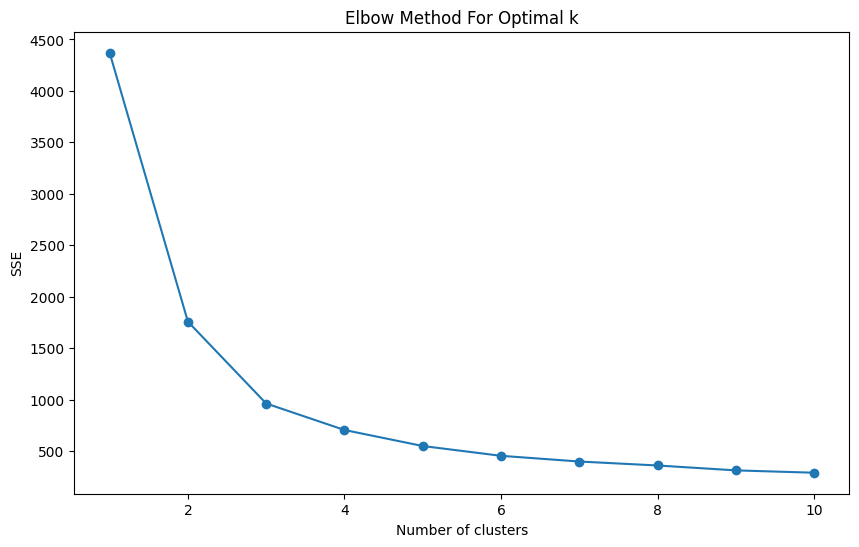

In [22]:
# Perform K-means clustering with train data
X = df_base[['pca1', 'pca2']]

from sklearn.cluster import KMeans

# Run kmeans 10 times from 1 to 10, each using the elbow method to find the appropriate number of clusters
# SSE (Sum of Squared Errors)
# kmeans.inertia_: sum of squared distances between all samples and their corresponding cluster centroids
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [23]:
# K-means clustering (assuming the number of clusters is 4)
# Put the predicted clusters into a new Cluster column.
kmeans = KMeans(n_clusters=4, random_state=42)
df_base['Cluster'] = kmeans.fit_predict(X)
df_base.head()

,pca1,pca2,Year,Player,Cluster
0,2.488648,-1.298711,2000,Park Jong -ho,2
1,4.863842,-0.328435,2000,Kim Dong -ju,1
2,2.058507,-0.439800,2000,Brido,2
3,5.544865,-0.087107,2000,Song Ji-man,1
4,2.134990,0.387255,2000,Davis,2


In [24]:
#Distribution of players by cluster
df_base['Cluster'].value_counts()

Cluster
0    204
2    162
3    158
1     70
Name: count, dtype: int64

In [25]:
#Athletes in the first cluster
df_base[df_base['Cluster']==1]

,pca1,pca2,Year,Player,Cluster
1,4.863842,-0.328435,2000,Kim Dong -ju,1
3,5.544865,-0.087107,2000,Song Ji-man,1
9,3.529112,-0.061254,2000,Youngwoo Lee,1
10,5.646473,0.117279,2000,Woods,1
12,4.438705,0.477328,2000,Jaehong Park,1
...,...,...,...,...,...
507,4.128552,0.356584,2012,Kang Jeong-ho,1
509,3.878337,-0.605667,2012,Park Seok-min,1
522,4.302426,0.465214,2012,Park Byung-ho,1
553,6.599618,-0.056334,2013,Park Byung-ho,1


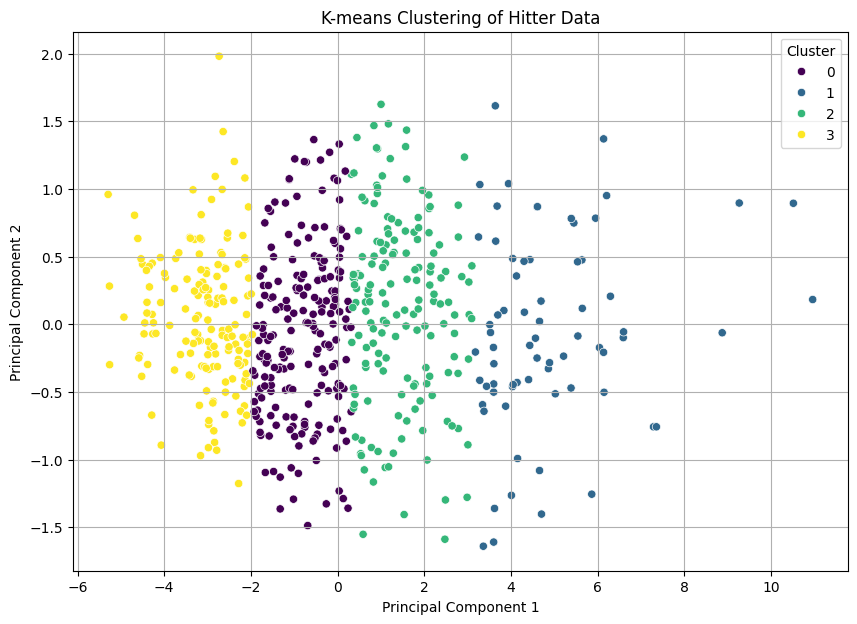

In [26]:
# Visualize clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_base, x='pca1', y='pca2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-means Clustering of Hitter Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Clustering with 2014 data

In [27]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 594 to 648
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    55 non-null     float64
 1   pca2    55 non-null     float64
 2   Year    55 non-null     object 
 3   Player  55 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.1+ KB


In [28]:
# Feature data extraction and standardization
# Scaling and PCA performed in batch before separating train, test
X_new = df_2014[['pca1', 'pca2']]
X_new.head()

,pca1,pca2
594,5.041371,-2.205559
595,4.635652,-1.072903
596,4.845792,-1.810337
597,9.716724,0.228912
598,6.127514,-0.186289


In [29]:
# Predict clusters for 2014 data
df_2014['Cluster'] = kmeans.predict(X_new)
df_2014.head()

,pca1,pca2,Year,Player,Cluster
594,5.041371,-2.205559,2014,Seo Geon-chang,1
595,4.635652,-1.072903,2014,Kim Tae-kyun,1
596,4.845792,-1.810337,2014,Son Ah-seop,1
597,9.716724,0.228912,2014,Kang Jeong-ho,1
598,6.127514,-0.186289,2014,Choi Hyeong-woo,1


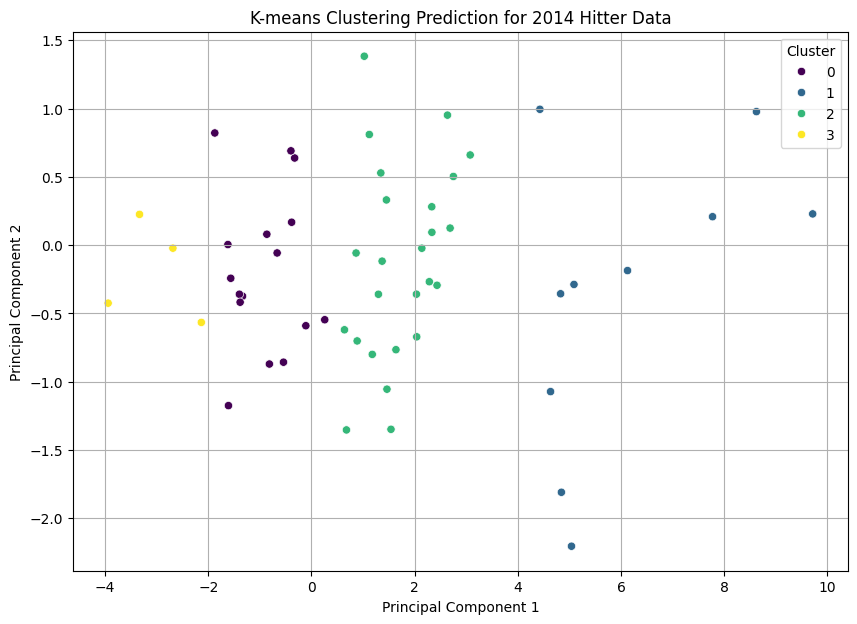

In [30]:
# Visualize clustering results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_2014, x='pca1', y='pca2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-means Clustering Prediction for 2014 Hitter Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

## Compare data before and after 2014

In [31]:
# Check the number of clusters
base_cluster_counts = df_base['Cluster'].value_counts().rename('Base Cluster Counts')
new_cluster_counts = df_2014['Cluster'].value_counts().rename('2014 Cluster Counts')

# Combine the number of clusters
combined_counts = pd.concat([base_cluster_counts, new_cluster_counts], axis=1).fillna(0)
combined_counts

,Base Cluster Counts,2014 Cluster Counts
Cluster,,
0,204,16
2,162,25
3,158,4
1,70,10


In [32]:
# Identify a representative player per cluster 
# Check the center as the average per cluster, and check how far away each player is from the center. 
# Return that player via the index with the minimum distance.

def get_representative_player(df, cluster_col, feature_cols):
    representatives = []
    for cluster in df[cluster_col].unique():
        cluster_data = df[df[cluster_col] == cluster]
        cluster_center = cluster_data[feature_cols].mean().values
        distances = cluster_data[feature_cols].apply(lambda row: ((row - cluster_center) ** 2).sum(), axis=1)
        representative_idx = distances.idxmin()
        representatives.append(cluster_data.loc[representative_idx, 'Player'])
    return representatives

In [33]:
# Output representative players for each cluster
base_representatives = get_representative_player(df_base, 'Cluster', ['pca1', 'pca2'])
new_representatives = get_representative_player(df_2014, 'Cluster', ['pca1', 'pca2'])

# Compare results
comparison_df = pd.DataFrame({
    'Base Representative Player': base_representatives,
    '2014 Representative Player': new_representatives
})

print(comparison_df)

  Base Representative Player 2014 Representative Player
0               Kim Dong-joo            Choi Hyeong-woo
1               Kim Tae-kyun                        Pie
2                       lion             Song Kwang-min
3              Park Jong -ho                  Naju Hwan


In [34]:
# Compare clusters of representative players
# base_cluster: Get the player's cluster value from base_df and return None if the player does not exist
# new_cluster: Get the value of the cluster the player belongs to from new_df, returning None if the player does not exist

def compare_representative_clusters(base_df, new_df, representatives):
    comparison = []
    for rep in representatives:
        base_cluster = base_df[base_df['Player'] == rep]['Cluster'].values[0] if not base_df[base_df['Player'] == rep].empty else None
        new_cluster = new_df[new_df['Player'] == rep]['Cluster'].values[0] if not new_df[new_df['Player'] == rep].empty else None
        comparison.append((rep, base_cluster, new_cluster))
    return comparison


In [35]:
# Create a list of representatives 
# Remove duplicates of representatives in base_representatives and new_representatives

representatives = list(set(base_representatives + new_representatives))
representatives

['Choi Hyeong-woo',
 'Kim Dong-joo',
 'Kim Tae-kyun',
 'Pie',
 'Song Kwang-min',
 'Park Jong -ho',
 'Naju Hwan',
 'lion']

In [36]:
#Compare Clusters
comparison_clusters = compare_representative_clusters(df_base, df_2014, representatives)

# Convert the result to a dataframe
comparison_df = pd.DataFrame(comparison_clusters, columns=['Player', 'Base Cluster', '2014 Cluster'])
comparison_df


,Player,Base Cluster,2014 Cluster
0,Choi Hyeong-woo,2.0,1.0
1,Kim Dong-joo,1.0,NaN
2,Kim Tae-kyun,1.0,1.0
3,Pie,NaN,2.0
4,Song Kwang-min,3.0,0.0
5,Park Jong -ho,2.0,NaN
6,Naju Hwan,3.0,3.0
7,lion,0.0,NaN


### Conclusion: 
    - Clusters of representative players change and disappear before and after 2014.
    - Kim Tae-gyun and Na Ju-hwan are grouped in the same cluster.
    - Choi Hyung-woo and Song Kwang-min were grouped in different clusters, suggesting that their performance or characteristics changed.
    - Factors that could cause a cluster to change include a player's performance and ability, a change in the batting order or position, or a change in league.
    - This can help teams recognize patterns in a player's performance and help them make strategic decisions.

# Use silhouette analysis to determine the proper k value

In [37]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    n_cols = len(cluster_lists)
    
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists):
        
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # bar graph representation in the form of fill_betweenx( ) by clustering count. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [38]:
df_base.head()

,pca1,pca2,Year,Player,Cluster
0,2.488648,-1.298711,2000,Park Jong -ho,2
1,4.863842,-0.328435,2000,Kim Dong -ju,1
2,2.058507,-0.439800,2000,Brido,2
3,5.544865,-0.087107,2000,Song Ji-man,1
4,2.134990,0.387255,2000,Davis,2


In [39]:
# Leaving only attributes to draw a silhouette
df_silhouette = df_base.drop(columns=['Year', 'Player', 'Cluster'])

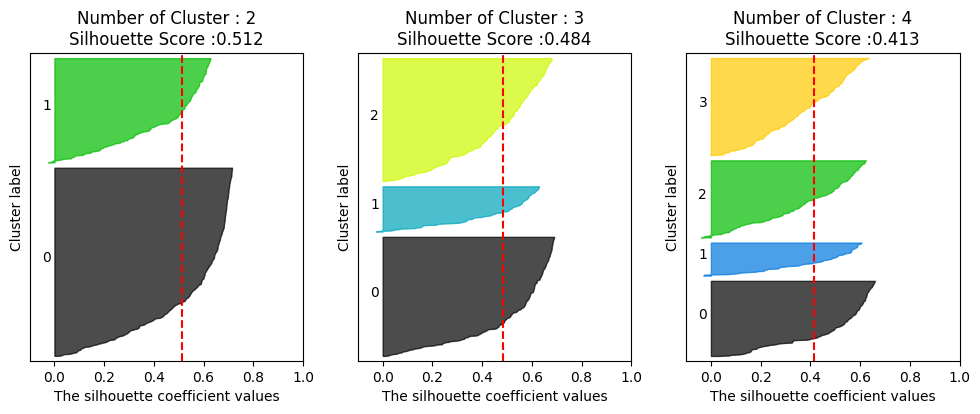

In [40]:
# Check 2, 3, and 4 best k-value candidates identified by the elbow method
visualize_silhouette([2, 3, 4], df_silhouette)

In [41]:
# Assuming an optimal k value of 3 through silhouette analysis
kmeans = KMeans(n_clusters=3, random_state=42)
df_base['Cluster'] = kmeans.fit_predict(X)
df_base.head()

,pca1,pca2,Year,Player,Cluster
0,2.488648,-1.298711,2000,Park Jong -ho,1
1,4.863842,-0.328435,2000,Kim Dong -ju,1
2,2.058507,-0.439800,2000,Brido,2
3,5.544865,-0.087107,2000,Song Ji-man,1
4,2.134990,0.387255,2000,Davis,2


In [42]:
#Distribution of players by cluster
df_base['Cluster'].value_counts()

Cluster
2    255
0    246
1     93
Name: count, dtype: int64

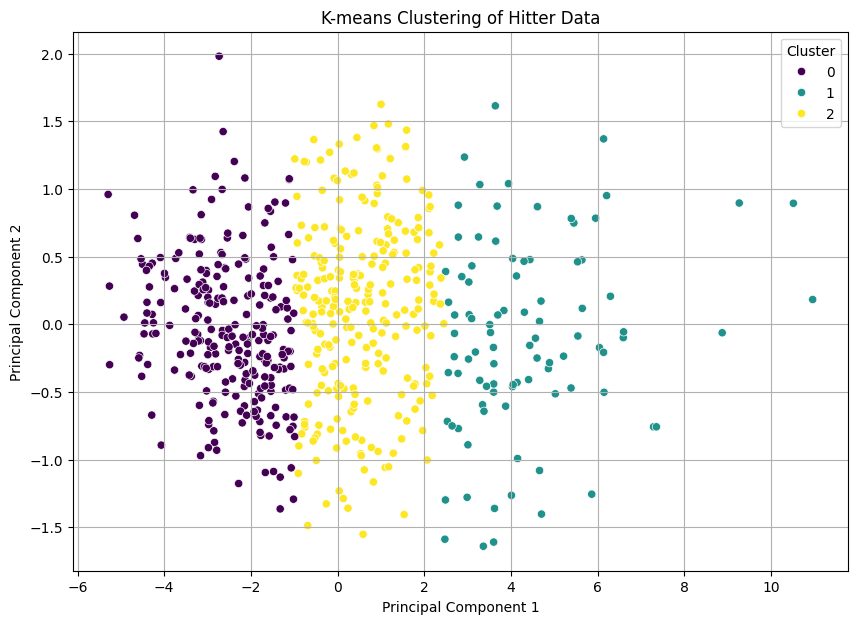

In [43]:
# Visualize clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_base, x='pca1', y='pca2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-means Clustering of Hitter Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [44]:
X_new = df_2014[['pca1', 'pca2']]

# Predict clusters for 2014 data
df_2014['Cluster'] = kmeans.predict(X_new)

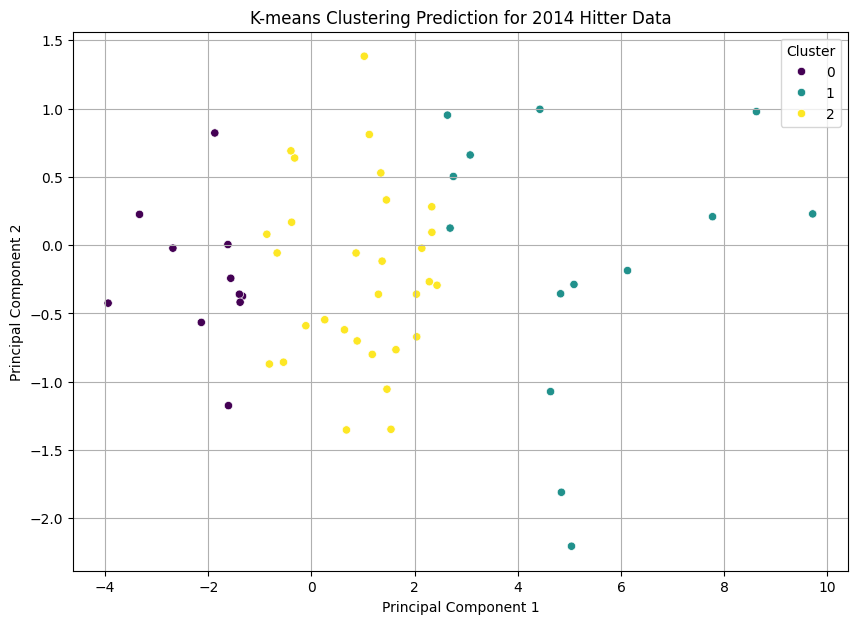

In [45]:
# Visualize clustering results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_2014, x='pca1', y='pca2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-means Clustering Prediction for 2014 Hitter Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [46]:
# Check the number of clusters
base_cluster_counts = df_base['Cluster'].value_counts().rename('Base Cluster Counts')
new_cluster_counts = df_2014['Cluster'].value_counts().rename('2014 Cluster Counts')

# Combine the number of clusters
combined_counts = pd.concat([base_cluster_counts, new_cluster_counts], axis=1).fillna(0)
combined_counts

,Base Cluster Counts,2014 Cluster Counts
Cluster,,
2,255,30
0,246,11
1,93,14


In [47]:
# Output representative players for each cluster
base_representatives = get_representative_player(df_base, 'Cluster', ['pca1', 'pca2'])
new_representatives = get_representative_player(df_2014, 'Cluster', ['pca1', 'pca2'])

# Compare results
comparison_df = pd.DataFrame({
    'Base Representative Player': base_representatives,
    '2014 Representative Player': new_representatives
})

print(comparison_df)

  Base Representative Player 2014 Representative Player
0                  Choi Jung                    Navarro
1                Hong Se-wan                  Jaewon Oh
2              Kim Jong Kook               Lee Yong-gyu


In [48]:
#Create a list of representative player want to compare
representatives = list(set(base_representatives + new_representatives))
representatives

['Hong Se-wan',
 'Choi Jung',
 'Jaewon Oh',
 'Kim Jong Kook',
 'Navarro',
 'Lee Yong-gyu']

In [49]:

comparison_clusters = compare_representative_clusters(df_base, df_2014, representatives)

# Convert the result to a dataframe
comparison_df = pd.DataFrame(comparison_clusters, columns=['Player', 'Base Cluster', '2014 Cluster'])
comparison_df

,Player,Base Cluster,2014 Cluster
0,Hong Se-wan,0.0,NaN
1,Choi Jung,0.0,NaN
2,Jaewon Oh,0.0,2.0
3,Kim Jong Kook,2.0,NaN
4,Navarro,NaN,1.0
5,Lee Yong-gyu,0.0,0.0


 ### Conclusion:
- There was a change in representation when the cluster was split into three. 
- The centers and boundaries of the clusters changed, indicating a change in clustering. 
- It is very important to set the appropriate k value, as it can change the strategy of the team depending on how you set the k value. 